In [1]:
def euler(n):
    x = 0
    y = 1
    L = [(x, y)]
    for k in range(n):
        x = x + 1 / n
        y = y * (1 + 1 / n)
        L.append([x, y])
    return L

In [9]:
euler(10)

[(0, 1),
 [0.1, 1.1],
 [0.2, 1.2100000000000002],
 [0.30000000000000004, 1.3310000000000004],
 [0.4, 1.4641000000000006],
 [0.5, 1.6105100000000008],
 [0.6, 1.771561000000001],
 [0.7, 1.9487171000000014],
 [0.7999999999999999, 2.1435888100000016],
 [0.8999999999999999, 2.357947691000002],
 [0.9999999999999999, 2.5937424601000023]]

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

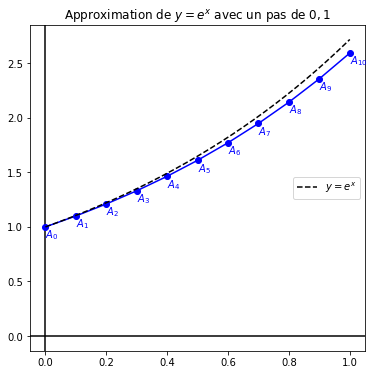

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(6,6))
points = np.array(euler(10))
plt.axhline(y=0,xmin=0,xmax=1,color='black')
plt.axvline(x=0,ymin=0,ymax=1, color='black')
x = points[:,0]
y = points[:,1]
plt.plot(x, y, 'bo-')
for k in range(11):
    plt.annotate(r"$A_{%s}$"%k, xycoords='data', xy=(x[k], y[k]), xytext=(x[k], y[k]-0.1), color='blue')
t = np.linspace(0, 1, 1000)
plt.plot(t, np.exp(t), color='black',linestyle='dashed',label=r'$y=e^{x}$')
plt.legend()
plt.title(r'Approximation de $y=e^{x}$ avec un pas de $0,1$')
plt.show()
plt.savefig('euler-10.pdf')

In [16]:


import matplotlib.animation
from IPython.display import HTML

NFrames = 30

fig, ax1 = plt.subplots(1, 1,figsize=(15, 6))

#ax1
t = np.linspace(0, 1, 1000)
ax1.plot(t, np.exp(t), color='black',linestyle='dashed',label=r'$y=e^{x}$')

#données animation
courbeSegments, = ax1.plot([],[],'.-',color="#1e7fcb")
ann_list = []  #liste d'annotations

#Positionnement des axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['bottom'].set_position(('data',0))
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position(('data',0))
ax1.set_ylim((0, 3))

def init():
    global courbeSegments
    courbeSegments.set_data([], [])
    return (courbeSegments,) 

def animate(i):
    global courbeSegments, ann_list
    for  a in ann_list:
        a.remove()
    ann_list[:] = []
    points = np.array(euler(i))
    lx, ly = points[:,0], points[:,1]
    courbeSegments.set_data(lx, ly)
    for k in range(i + 1):
        ann =  ax1.annotate(r"$A_{%s}$"%k, xycoords='data', xy=(lx[k], ly[k]), xytext=(lx[k], ly[k]-0.01), color='blue')
        ann_list.append(ann)
    ax1.set_title('Courbe approchée - de la fonction exponentielle par la méthode d\'Euler, nombre de subdivisions:{}'.format(i+1))
    fig.savefig('approx-expo-euler-{}subdivisions.pdf'.format(i))
    return (courbeSegments,)
  

plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=NFrames,init_func=init,blit=False,interval=1000)
# l'un ou l'autre
#HTML(ani.to_jshtml())
HTML(ani.to_html5_video())




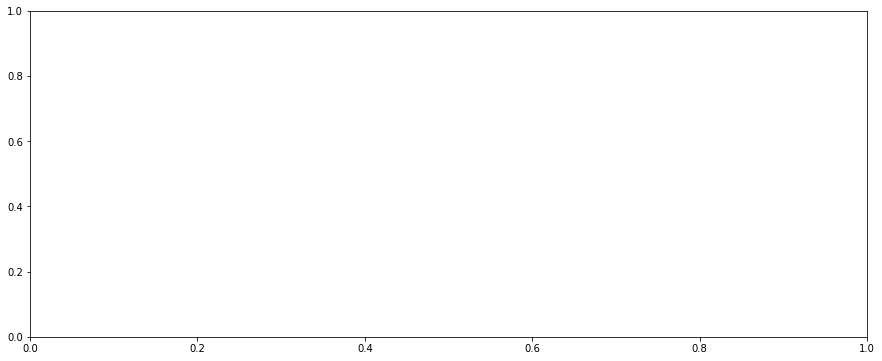

In [11]:
fig, ax1 = plt.subplots(1, 1,figsize=(15, 6))

In [12]:
ax1